In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
sys.path.append("../")

from utils_common import EvalData

## Extracting Test Data

In [4]:
# pre-trained model
# model_file_name = "./logs/model_trained_on_ModelNet40_model_best.pth"

In [5]:
labels = ["modelnet test (lk)", 
          "modelnet train (lk)", 
          "shapenet.sim.easy", "shapenet.sim.medium", "shapenet.sim.hard",
          "shapenet.real.easy", "shapenet.real.medium", "shapenet.real.hard"]

files = []
# evaluated on: modelnet test dataset
files.append("../runs/Nov27_12-16-41_spark-agent/eval_data.pkl")

# evaluated on: modenet train dataset 
files.append("../runs/Nov27_12-46-27_spark-agent/eval_data.pkl")

# evaluated on: shapenet.sim.easy  
files.append("../runs/Dec04_09-27-56_spark-agent/eval_data.pkl")

# evaluated on: shapenet.sim.medium  
files.append("../runs/Dec04_09-29-07_spark-agent/eval_data.pkl")

# evaluated on: shapenet.sim.hard 
files.append("../runs/Dec04_09-30-31_spark-agent/eval_data.pkl")

# evaluated on: shapenet.real.easy  
files.append("../runs/Dec04_09-32-01_spark-agent/eval_data.pkl")

# evaluated on: shapenet.real.medium  
files.append("../runs/Dec04_09-33-27_spark-agent/eval_data.pkl")

# evaluated on: shapenet.real.hard 
files.append("../runs/Dec04_09-35-06_spark-agent/eval_data.pkl")


In [7]:
data = dict()

for i, label in enumerate(labels):
    eval_data = EvalData() 
    
    print("label: ", label)
    print("loading file: ", files[i])
    eval_data.load(files[i])
    
    eval_data.complete_eval_data()
    
    data[label] = eval_data.data

label:  modelnet test (lk)
loading file:  ../runs/Nov27_12-16-41_spark-agent/eval_data.pkl
label:  modelnet train (lk)
loading file:  ../runs/Nov27_12-46-27_spark-agent/eval_data.pkl
label:  shapenet.sim.easy
loading file:  ../runs/Dec04_09-27-56_spark-agent/eval_data.pkl
label:  shapenet.sim.medium
loading file:  ../runs/Dec04_09-29-07_spark-agent/eval_data.pkl
label:  shapenet.sim.hard
loading file:  ../runs/Dec04_09-30-31_spark-agent/eval_data.pkl
label:  shapenet.real.easy
loading file:  ../runs/Dec04_09-32-01_spark-agent/eval_data.pkl
label:  shapenet.real.medium
loading file:  ../runs/Dec04_09-33-27_spark-agent/eval_data.pkl
label:  shapenet.real.hard
loading file:  ../runs/Dec04_09-35-06_spark-agent/eval_data.pkl


## ADD-S and ADD-S (AUC)

In [8]:
df = pd.DataFrame(data, index=["adds_th_score", "adds_auc"])
display(df)

,modelnet test (lk),modelnet train (lk),shapenet.sim.easy,shapenet.sim.medium,shapenet.sim.hard,shapenet.real.easy,shapenet.real.medium,shapenet.real.hard
adds_th_score,0.949447,0.972624,0.996094,0.503906,0.208984,0.359375,0.154297,0.074219
adds_auc,0.952446,0.974914,0.996093,0.504915,0.212514,0.356083,0.169392,0.079324


## Distribution of Error Metrics

In [9]:
sns.set(style="darkgrid")
adds_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["adds"]}))
    adds_data[key] = df_


In [10]:
conca = pd.concat([adds_data[key].assign(dataset=key) for key in adds_data.keys()])

Text(0.5, 0, 'ADD-S')

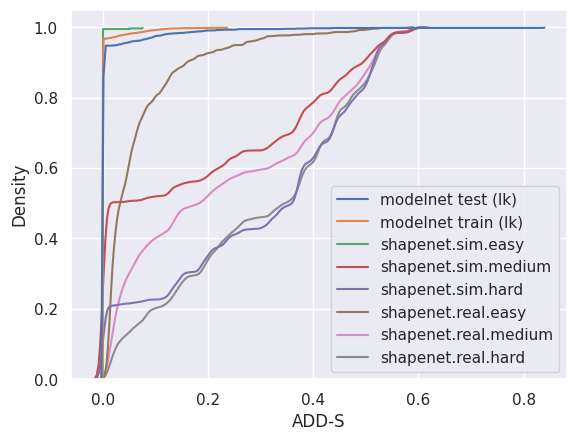

In [11]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('ADD-S')

In [12]:
sns.set(style="darkgrid")
rerr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["rerr"]}))
    rerr_data[key] = df_


In [13]:
conca = pd.concat([rerr_data[key].assign(dataset=key) for key in rerr_data.keys()])

Text(0.5, 0, 'Rotation Error (axis-angle, in rad)')

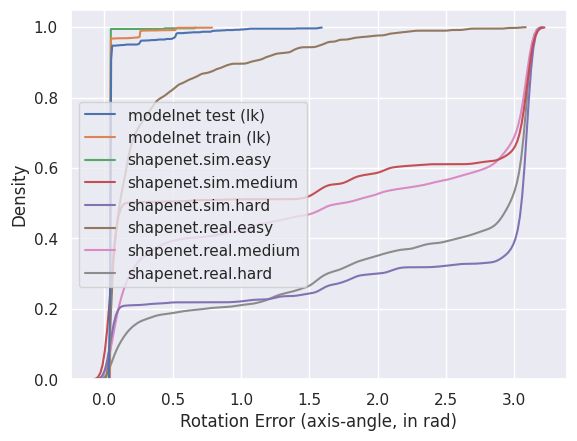

In [14]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Rotation Error (axis-angle, in rad)')

In [15]:
sns.set(style="darkgrid")
terr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["terr"]}))
    terr_data[key] = df_


In [16]:
conca = pd.concat([terr_data[key].assign(dataset=key) for key in terr_data.keys()])

Text(0.5, 0, 'Translation Error')

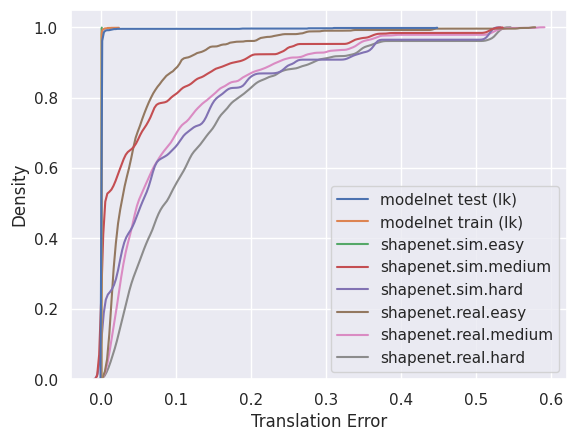

In [17]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Translation Error')